# SSB50806: Systems & Synthetic Biology
## Fitting models to data
Previously you saw how to code ODE models in Python. We are now going to replicate the model you created in iBioSim to perform some simulation experiments and find good parameter sets for the system relative to a give dataset.



In [ ]:
#import necessary packages
import numpy as np #math and arrays
from scipy.integrate import odeint #differential equations
import matplotlib.pyplot as plt #plotting

In [ ]:
#run a "magic" command to make sure figures are rendered properly in the notebook
%matplotlib inline

## Part 1: The model
On Tuesday you were asked to code the model and initial parameter set that you obtained from iBioSim in Week 2. This is now given here as we will need it later.

In [ ]:
# Specify parameter values
kcr = 1
kcf = 0.05
ko1 = 0.05
kd1 = 0.0075
kb = 0.0001
kof1 = 0.033
kor1 = 1
nr = 30
ka = 0.25
kaof = 1
kaor = 1
kaf = 0.033
kar = 1
ko2 = 0.05
kd2 = 0.0075
ko3 = 0.05
kd3 = 0.0075
kof2 = 0.033
kor2 = 1
krf = 0.5
krr = 1
n1 = 1
n2 = 1
n3 = 1
n4 = 1
n5 = 2
n6 = 2

# set up parameters vector
parameters = [kcr, kcf, ko1, kd1, kb, kof1, kor1, nr, ka, kaof, kaor, kaf, kar, ko2, kd2, ko3, kd3, kof2, kor2, krf, krr, n1, n2, n3, n4, n5, n6]

In [ ]:
# Set initial values for all state variables
x1_init = 1 # x1 = Ara
x2_init = 10 # x2 = dCas9
x3_init = 0 # x3 = sgRNA-dCas9
x4_init = 0 # x4 = AraC
x5_init = 0 # x5 = AraComplex
x6_init = 0 # x6 = sgRNA
x7_init = 0 # x7 = mKO2
x8_init = 2 # x8 = pBAD
x9_init = 0 # x9 = GFP
x10_init = 2 # x10 = pGFP

# set up vector
initial_conditions = [x1_init, x2_init, x3_init, x4_init, x5_init, x6_init, x7_init, x8_init, x9_init, x10_init]

In [ ]:
def deriv(x, t, parameters):
    
    # Unpack the state variable information
    # The first argument contains the values of the state variables in order
    x1 = x[0] # Ara
    x2 = x[1] # dCas9
    x3 = x[2] # sgRNA-dCas9
    x4 = x[3] # AraC
    x5 = x[4] # AraComplex
    x6 = x[5] # sgRNA
    x7 = x[6] # mKO2
    x8 = x[7] # pBAD
    x9 = x[8] # GFP
    x10 = x[9] # pGFP
    
    # Unpack parameter values
    kcr = parameters[0]
    kcf = parameters[1]
    ko1 = parameters[2]
    kd1 = parameters[3]
    kb = parameters[4]
    kof1 = parameters[5]
    kor1 = parameters[6]
    nr = parameters[7]
    ka = parameters[8]
    kaof = parameters[9]
    kaor = parameters[10]
    kaf = parameters[11]
    kar = parameters[12]
    ko2 = parameters[13]
    kd2 = parameters[14]
    ko3 = parameters[15]
    kd3 = parameters[16]
    kof2 = parameters[17]
    kor2 = parameters[18]
    krf = parameters[19]
    krr = parameters[20]
    n1 = parameters[21]
    n2 = parameters[22]
    n3 = parameters[23]
    n4 = parameters[24]
    n5 = parameters[25]
    n6 = parameters[26]

    # Calculate the derivatives of the states
    dx1dt = kcr*x5 - kcf*(x1**n1)*(x4**n2)
    dx2dt = kcr*x3 - kcf*(x2**n3)*(x6**n4)
    dx3dt = kcf*(n2**n3)*(x6**n4) - kcr*x3
    dx4dt = kcr*x5 - kcf*(x1**n1)*(x4**n2) + 10*ko1
    dx5dt = kcf*(x1**n1)*(n4**n2) - kcr*x5 - kd1*x5
    dx6dt = kcr*x3 - kcf*(x2**n3)*(x6**n4) + 10*x8*((kb*kof1/kor1)*nr + (ka*kaof/kaor)*nr*((kaf*x5/kar)**n5))/(1 + (kof1/kor1)*nr + (kaof/kaor)*nr*((kaf*x5/kar)**n5))
    dx7dt = 10*x8*((kb*kof1/kor1)*nr + (ka*kaof/kaor)*nr*((kaf*x5/kar)**n5))/(1 + (kof1/kor1)*nr + (kaof/kaor)*nr*((kaf*x5/kar)**n5)) + 10*ko2 - kd2*x7 
    dx8dt = 0
    dx9dt = 10*x10*(ko3*kof2*nr/kor2)/(1 + (kof2*nr/kor2) + ((krf*x3/krr)**n6)) + 10*ko3 - kd3*x9
    dx10dt = 0
    
    # Make a list of all derivatives in the correct order
    dxdt = [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt, dx8dt, dx9dt, dx10dt]

    # Return the derivatives
    return dxdt

In [ ]:
def simulateODE(parameter_values, initial_conditions, t_end = 1000, Nsteps = 10000):

    # Make a numpy array with the time steps for which you want output
    timepoints = np.linspace(0, t_end, Nsteps)
    
    # Assign parameters
    parameters = parameter_values
    
    # Set initial values for all state variables
    x_init = initial_conditions
    
    # Calculate state variables at requested time points
    x_t = odeint(deriv, x_init, timepoints, args = (parameters,))
    
    # Return time points and state variables at those time points
    # This technically combines both variables into a tuple which can be unpacked after calling the function
    return timepoints, x_t

In [ ]:
timepoints, x_t = simulateODE(parameters, initial_conditions, t_end = 1000, Nsteps = 10000)
gfp_t = x_t[:,8]
    
# Plot the state variables against time
plt.plot(timepoints, gfp_t, label='Ara = 1')
plt.legend()
plt.xlabel('time')
plt.ylabel('GFP')
plt.show()

## Part 2: Loading data

Given the model above, a dataset from an experiment of this system can be found on Brightspace in the file dataForPractical.txt - the first column is time, and the remaining columns are three experimental replicates.

You need to load this data and get it organised.

To load the data use the np.loadtxt function. This has been provided for you - with this data, calculate means and variances using the np.mean and np.var functions.

In [ ]:
# this is the correct usage of the loadtxt function to read the columns from the data file
data_time, data1, data2, data3 = np.loadtxt("./dataForPractical.txt",unpack=True)
print(np.transpose([data_time, data1, data2, data3]))

In [ ]:
# Calculate the mean here and call the vector data_mean. You will need to use axis=0 as an option.

In [ ]:
# Calculate the variance here and call the vector data_var. You will need to use axis=0 as an option.

In [ ]:
# Print the organised data to make sure it all looks good

## Part 3: Sampling parameter space

We will now obtain a 100 parameter sets from a Latin Hypercube Sample and look to compare the resulting simulations (using Ara = 1) with the simulations we obtained in Part 1. As such, we can see if the "true" parameter set exists within our parameter sample.

First, you will need to install pyDOE in the same way as you installed COBRA previously. Use

Mac: pip install --upgrade pyDOE

Windows: conda install -c conda-forge pydoe2

(If pydoe2 does not work then use pydoe.)

Now you should be able to import the functions into your notebook.

In [ ]:
from pyDOE import *

Now we need to create a sample of 100 sets of 27 parameters. To do this we use the lhs function. The result is a matrix with 27 columns and 100 rows. Note that all samples will be bound between 0 and 1.

In [ ]:
sample = lhs(27, samples=100)
print(sample)

To analyse the sample, plot two of these columns (representing two parameters) to see where parameter space has been sampled.

In [ ]:
# Create plot here

Now we need to "stretch" each sample to be within a lower bound and upper bound for each parameter value. We will create bounds around the "true" parameter set we have above. We will not touch the "n" parameters that are powers in our equations.

In [ ]:
# Set up bounds
lower_bounds = [0.8,0.03,0.03,0.006,0.00008,0.025,0.8,20,0.1,0.8,0.8,0.025,0.8,0.03,0.005,0.03,0.002,0.025,0.8,0.3,0.8,1,1,1,1,2,2]
upper_bounds = [1.2,0.07,0.07,0.009,0.00012,0.04,1.2,40,0.4,1.2,1.2,0.04,1.2,0.07,0.01,0.07,0.015,0.04,1.2,0.7,1.2,1,1,1,1,2,2]

In [ ]:
# Now, for each row/parameter in the sample matrix, we need to re-scale these using the bounds
# Use a for-loop to do this as in the provided example notebooks and lectures
# Print the new sample to check the "stretching" worked

We now have our parameter sets to test. Your task is to simulate the model for each of these 100 parameter sets, using the same initial conditions (with Ara = 1) and time-span as before, and obtain the GFP time-series.

You can use the same simulateODE function as above.

Plot the GFP time-series to see how they vary over time.

In [ ]:
# Initialize array for results
GFP_series = np.zeros((10000,100))

# Create a for-loop to simulate 100 GFP time-series

In [ ]:
# Plot time-series

Now the question is - which parameter set is best? We want to compare the simulated GFP with the data.

To do this, write a function that takes the 100 GFP time-series and compares them to data using the formula

\begin{equation}
\Omega_j = \sum_{i=t_0}^{t_f}\frac{\bigg(GFP_{sim}(j,i)-GFP_{data}(i)\bigg)^2}{\sigma_i^2}\nonumber
\end{equation}

where $j$ is the 100 parameter sets tested and $i$ is the number of time-points measured, and $\sigma^2$ is the variance of the data.

Do not forget the you need to interpolate the simulations, as in lectures, to match the data vector.

The best-fitting parameter set is the one that has the lowest score. You can find the index of the lowest score by using np.argmin. Print the lowest score and best sample.

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
# set up empty solution vector
omega = np.zeros(100,)

# set up for loop to calculate scores
for i in range(0,100):
    
# Print optimal score and optimal parameter set here

This tells us that this parameter set has the lowest score, and the best fit to the data. We can check this with a plot. Use the plt.errorbar function to plot the data.

In [ ]:
# Plot optimal simulation against data here

Finally, let's check the parameter set and see how far it is from the original set. What do you conclude?

In [ ]:
original_params = [1,0.05,0.05,0.0075,0.0001,0.033,1,30,0.25,1,1,0.033,1,0.05,0.0075,0.05,0.0075,0.033,1,0.5,1,1,1,1,1,2,2]
print(sample[np.argmin(omega),:])

In [ ]:
print(abs(sample[np.argmin(omega),:]-original_params)/original_params)

## Part 4: Make a prediction!
Now you have a good-fitting model to our data, we can make a prediction for a new experiment. With this system, a good estimate would be to see how the system responds to changes Ara inputs.

Simulate GFP for Ara = 0.01 and Ara = 100. What does the model predict?

In [ ]:
# Ara = 0.01 simulation

# Ara = 100 simulation

In [ ]:
# Plot GFP from both simulations

You now have some new data obtained from the lab where Ara has been changed as you have just predicted...

Ara = 0.01
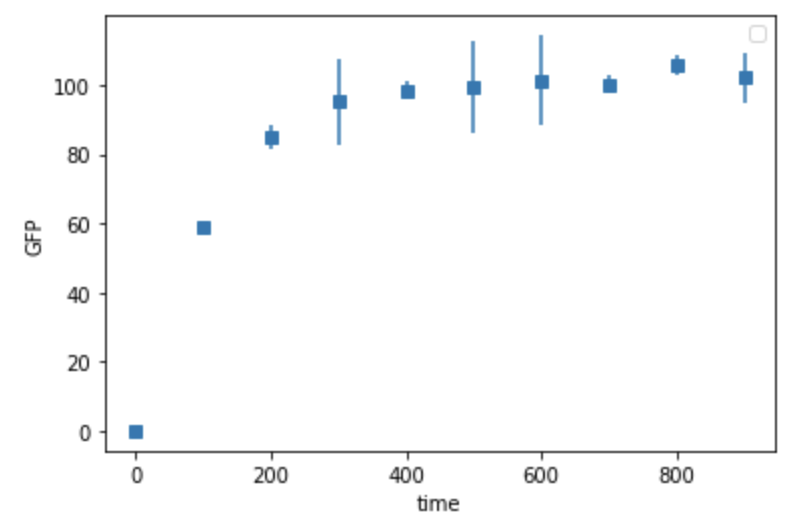

Ara = 100
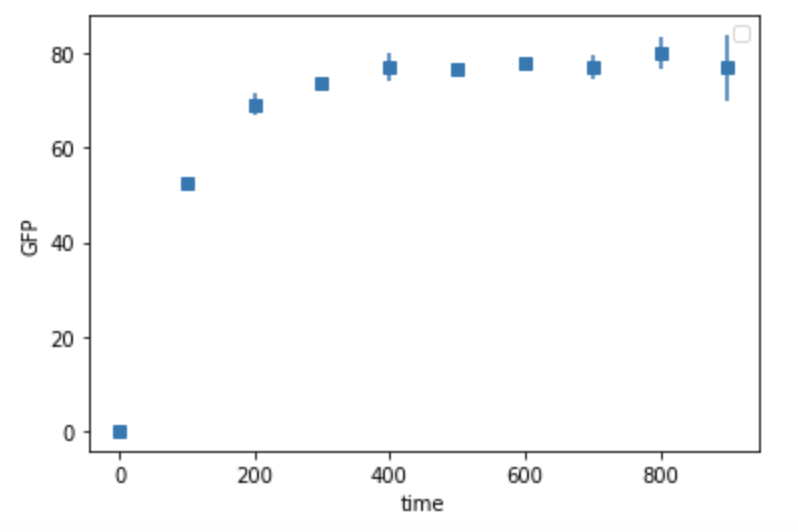

How does your prediction match with the newly obtained data? Is your prediction qualitatively reasonable?

## Part 5: Effects of dilution on a system
During lectures, we have not had time to discuss the effects of cell growth on a synthetic circuit. This is discussed more in SSB31806 and is too advanced for this course. However, it may be useful for your project work later to understand how to model this. However, the key to keep in mind here is that, by including cell population growth, our model now takes units of concentration/cell population and not just concentration. This changes how we should interpret results.

To add a simple model for dilution, we can add a new ODE for cell population growth

\begin{align}
\mu &= \mu_{max}e^{\frac{-1}{2}\bigg(\frac{t-t_c}{100}\bigg)^2}\bigg(1-\frac{V}{K}\bigg) \nonumber \\
\frac{dV}{dt} &= \mu{V} \nonumber
\end{align}

where $\mu_{max}$ is the maximum growth rate calculated from, e.g., flux balance analysis in units of h$^{-1}$ (this will be discussed tomorrow), $t_c$ is the time at which maximum growth occurs, and $K$ is the carrying capacity and the value obtained after exponential growth.

To add this to your ODE model, you can add another equation - for this test, use $\mu_{max} = 1$ h$^{-1} = \frac{1}{60}$ min$^{-1}$, $t_c = 500$ and $K = 0.8$.

Notice here that we are talking about a time-scale of minutes. All the parameters and systems we have obtained from iBioSim use parameters in seconds... this means we need to rescale our ODEs a little and add dilution. We can do this in two steps:

1. Alter the ODEs such that $\frac{dx_i}{d\tau} = 60*\frac{dx_i}{dt}$ where $\tau$ has units of minutes and $t$ is the original ODE in seconds. This is explained further in SSB30806, but for your purposes just multiply the ODEs by 60. For example 

$dxdt = 60*(\text{production} - \text{degradation}*x)$.

2. Include the dilution term to your ODE as an extra degradation term $\mu$ such that you finally get 

$dxdt = 60*(\text{production} - \text{degradation}*x) - \mu*x$,

where $\mu$ is defined above. Leave $dV/dt$ as defined above with no change.

For the ODEs associated with amounts of promoter, leave these equal to 0 to reflect that plasmid replication keeps pace with cell growth.

You have two tasks:
1. Add dilution to your model. Use the np.exp function for the exponential term.
2. Plot GFP/cell and V using Ara = 1, with initial V(0) = 0.1. It is easiest to do these on separate plots.
3. How does dilution effect GFP accumulation?

In [ ]:
# Place your new model deriv_dilute here

In [ ]:
# Create a simulateODEdilute function here

In [ ]:
# Set initial values for all state variables

In [ ]:
# Simulate model

In [ ]:
# Plot GFP

In [ ]:
# Plot V

In [ ]:
# Plot GFP/V